## From Regression to RNN

Learning objectives:
* [Objective 1] ARIMA
* [Objective 2] RNN requires a 3-D tensor as input
* [Objective 3] Stock data
* [Objective 4] Create the training and test data for RNN/LSTM
* [Objective 5] Run a simple RNN model
* [Objective 6] RNN/LTSM requires normalized input data
* [Objective 7] LSTM
* [Objective 8] LSTM Regularization
* [Objective 9] GRU
* [Objective 10] GRU Regularization

Note: Every run of the following code may vary.

## ARIMA modeling
  

In [1]:
# Import necessary packages for time series analysis
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
# Import the ArmaProcess class to generate ARIMA time series data
from statsmodels.tsa.arima_process import ArmaProcess
# Import the partial autocorrelation function (pacf) to analyze the correlation between time series data
from statsmodels.tsa.stattools import pacf
# Import the yule_walker function to fit AR models to time series data
from statsmodels.regression.linear_model import yule_walker
# Uncomment the next line to import the Augmented Dickey-Fuller test to perform unit root tests
#from statsmodels.tsa.stattools import adfuller
# Import matplotlib for plotting and visualization
import matplotlib.pyplot as plt
# Import numpy for numerical computations
import numpy as np
# Specify that matplotlib plots should be displayed inline within the Jupyter notebook
%matplotlib inline


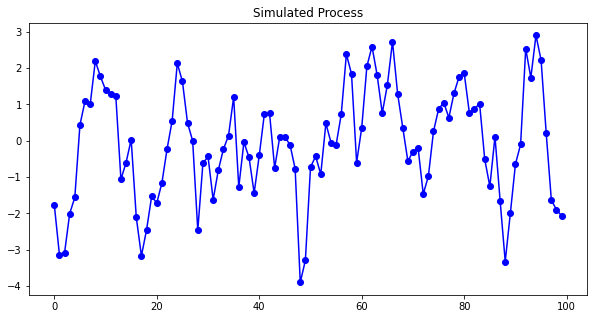

In [3]:
# Import the required libraries
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
# Uncomment the line below if you want to use the adfuller method
#from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
# Set matplotlib to display the plots inline
%matplotlib inline

# Generate the data for the simulation
# Define the autoregression and moving average coefficients
ar = np.array([1, -0.8, 0.2])
ma = np.array([1])
# Create an ArmaProcess instance with the specified coefficients
my_simulation = ArmaProcess(ar, ma).generate_sample(nsample=100)

# Plot the simulated process
plt.figure(figsize=[10, 5]) # Set dimensions for the figure
plt.plot(my_simulation, linestyle='-', marker='o', color='b')
plt.title("Simulated Process")
plt.show()


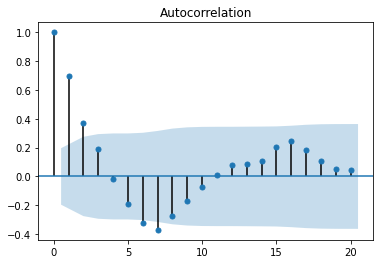

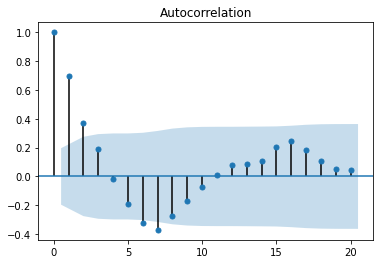

In [4]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
plot_acf(my_simulation)

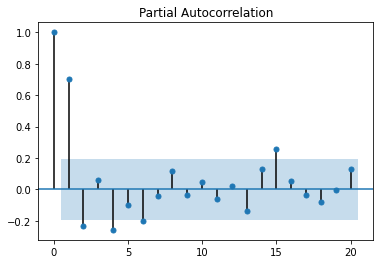

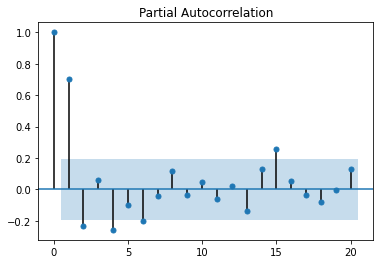

In [5]:
plot_pacf(my_simulation)

In [6]:
# Import necessary libraries and modules
import warnings
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA

# Fit an ARIMA model with order (2, 0, 0) to the time series data
mod = sm.tsa.arima.ARIMA(my_simulation, order=(2, 0, 0))

# Fit the ARIMA model to the time series data
mod_fit = mod.fit()

# Print a summary of the model's results
print(mod_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -147.593
Date:                Tue, 07 Feb 2023   AIC                            303.187
Time:                        12:49:47   BIC                            313.608
Sample:                             0   HQIC                           307.404
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1168      0.307     -0.380      0.704      -0.719       0.485
ar.L1          0.8555      0.114      7.524      0.000       0.633       1.078
ar.L2         -0.2122      0.112     -1.898      0.0

In [7]:
array = np.random.random(20) #.astype(np.float32
array.reshape((1,20,1))
array

array([0.04120838, 0.02619519, 0.50671216, 0.30572156, 0.67499954,
       0.07282616, 0.30727845, 0.48648265, 0.60798048, 0.83552957,
       0.06542572, 0.03671739, 0.72144973, 0.09880385, 0.28964679,
       0.21513419, 0.3055785 , 0.43133613, 0.07323963, 0.5144212 ])

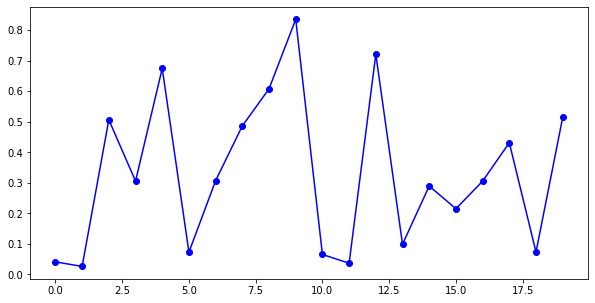

In [8]:
plt.figure(figsize=[10, 5]); # Set dimensions for figure
plt.plot(array, linestyle='-', marker='o', color='b')
plt.show()

In [9]:
array.reshape((4,5,1))

array([[[0.04120838],
        [0.02619519],
        [0.50671216],
        [0.30572156],
        [0.67499954]],

       [[0.07282616],
        [0.30727845],
        [0.48648265],
        [0.60798048],
        [0.83552957]],

       [[0.06542572],
        [0.03671739],
        [0.72144973],
        [0.09880385],
        [0.28964679]],

       [[0.21513419],
        [0.3055785 ],
        [0.43133613],
        [0.07323963],
        [0.5144212 ]]])

In [10]:
array.reshape((2,5,2))

array([[[0.04120838, 0.02619519],
        [0.50671216, 0.30572156],
        [0.67499954, 0.07282616],
        [0.30727845, 0.48648265],
        [0.60798048, 0.83552957]],

       [[0.06542572, 0.03671739],
        [0.72144973, 0.09880385],
        [0.28964679, 0.21513419],
        [0.3055785 , 0.43133613],
        [0.07323963, 0.5144212 ]]])

In [11]:
# Example 1
array = np.random.random(20) #.astype(np.float32
array.reshape((1,20,1))

# Example 2
array.reshape((4,5,1))

# Example 3
array.reshape((2,5,2))

array([[[0.47691935, 0.30529527],
        [0.96991553, 0.81364371],
        [0.91095562, 0.783977  ],
        [0.49651489, 0.99227133],
        [0.69242981, 0.82044448]],

       [[0.11243147, 0.53113214],
        [0.59885873, 0.68418304],
        [0.23249198, 0.51236155],
        [0.74150947, 0.32843268],
        [0.30884155, 0.27125589]]])

* use numpy to store and manipulate image data. 
* We will use the Python Imaging library (PIL) to read and write data to standard file formats.
* 4 lines of pixels, each line of pixels contains 5 pixels, and each pixel contains 3 bytes (red, green, blue)
* The shape of the array is: height x width x 3.

In [12]:
width = 5
height = 4
RGB = 3
p = width * height * RGB
img_data = np.random.randint(100,high=255, size=p, dtype=np.uint8) # Generate values in (100,255)
img_data = img_data.reshape((height, width, RGB))
img_data

array([[[120, 131, 190],
        [176, 233, 111],
        [184, 181, 250],
        [226, 224, 186],
        [239, 224, 226]],

       [[223, 242, 104],
        [120, 164, 219],
        [123, 206, 177],
        [171, 160, 214],
        [232, 144, 198]],

       [[207, 140, 249],
        [113, 105, 160],
        [161, 147, 156],
        [148, 200, 197],
        [220, 187, 101]],

       [[243, 173, 195],
        [193, 148, 164],
        [228, 139, 188],
        [155, 162, 175],
        [214, 198, 168]]], dtype=uint8)

In [13]:
from PIL import Image
img = Image.fromarray( img_data)
img.show()

In [46]:
# Importing required libraries
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

# Downloading Amazon stock data for the given date range
AMZN = yf.download('AMZN', 
                      start='2013-01-01', 
                      end='2022-12-31', 
                      progress=False)
# To download data for all available dates, use the following line of code
# AMZN = yf.download('AMZN') 

# Selecting columns of interest and rounding the values to 2 decimal places
all_data = AMZN[['Adj Close','Open', 'High', 'Low', 'Close', 'Volume']].round(2)

# Displaying first 10 rows of the data
all_data.head(10)


,Adj Close,Open,High,Low,Close,Volume
Date,,,,,,
2013-01-02 00:00:00-05:00,12.87,12.80,12.90,12.66,12.87,65420000
2013-01-03 00:00:00-05:00,12.92,12.86,13.04,12.82,12.92,55018000
2013-01-04 00:00:00-05:00,12.96,12.88,12.99,12.83,12.96,37484000
2013-01-07 00:00:00-05:00,13.42,13.15,13.49,13.13,13.42,98200000
2013-01-08 00:00:00-05:00,13.32,13.35,13.45,13.18,13.32,60214000
2013-01-09 00:00:00-05:00,13.32,13.41,13.48,13.27,13.32,45312000
2013-01-10 00:00:00-05:00,13.27,13.43,13.44,13.11,13.27,57268000
2013-01-11 00:00:00-05:00,13.40,13.26,13.42,13.21,13.40,48266000
2013-01-14 00:00:00-05:00,13.64,13.40,13.71,13.38,13.64,85500000


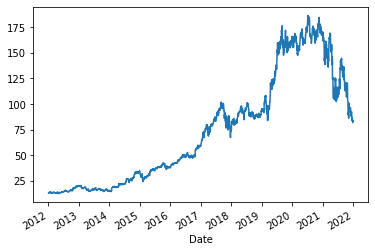

In [47]:
all_data['Adj Close'].plot()

In [48]:
print("There are "+ str(all_data[:'2018'].shape[0]) + " observations in the training data")
print("There are "+ str(all_data['2019':].shape[0]) + " observations in the test data")

There are 1510 observations in the training data
There are 1008 observations in the test data


In [49]:
# Function for splitting the data into training and test sets for time series analysis
def ts_train_test(all_data, time_steps, for_periods):
    '''
    input: 
      all_data: dataframe containing dates and price data
      time_steps: number of previous time steps used to predict future values
      for_periods: number of future values to be predicted
    output:
      X_train: training data from 2013/1/1-2018/12/31
      y_train: target values for training data
      X_test: test data from 2019 -
    '''
    # Create training and test sets
    ts_train = all_data[:'2018'].iloc[:,0:1].values
    ts_test = all_data['2019':].iloc[:,0:1].values
    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)

    # Create training data with time_steps and for_periods
    X_train = []
    y_train = []
    for i in range(time_steps, ts_train_len - 1): 
        X_train.append(ts_train[i-time_steps:i,0])
        y_train.append(ts_train[i:i+for_periods,0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshape X_train for efficient modeling
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Prepare inputs for X_test
    inputs = pd.concat((all_data["Adj Close"][:'2018'], all_data["Adj Close"]['2019':]), axis=0).values
    inputs = inputs[len(inputs) - len(ts_test) - time_steps:]
    inputs = inputs.reshape(-1, 1)

    # Prepare X_test
    X_test = []
    for i in range(time_steps, ts_test_len + time_steps - for_periods):
        X_test.append(inputs[i-time_steps:i,0])
        
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    return X_train, y_train, X_test

# Split the data into training and test sets
X_train, y_train, X_test = ts_train_test(all_data, 5, 2)

# Print shapes of training and test sets
print("X_train shape: ", X_train.shape[0], X_train.shape[1])


(1504, 5)

In [50]:
# Make the 3-D shape to a data frame so we can see: 
X_train_see = pd.DataFrame(np.reshape(X_train, (X_train.shape[0],X_train.shape[1])))
y_train_see = pd.DataFrame(y_train)
pd.concat([X_train_see,y_train_see],axis=1)

,0,1,2,3,4,0,1
0,12.87,12.92,12.96,13.42,13.32,13.32,13.27
1,12.92,12.96,13.42,13.32,13.32,13.27,13.40
2,12.96,13.42,13.32,13.32,13.27,13.40,13.64
3,13.42,13.32,13.32,13.27,13.40,13.64,13.60
4,13.32,13.32,13.27,13.40,13.64,13.60,13.45
...,...,...,...,...,...,...,...
1499,79.60,76.05,77.57,74.75,73.04,68.87,67.20
1500,76.05,77.57,74.75,73.04,68.87,67.20,73.54
1501,77.57,74.75,73.04,68.87,67.20,73.54,73.08
1502,74.75,73.04,68.87,67.20,73.54,73.08,73.90


In [51]:
# Make the 3-D shape to a data frame so we can see: 
X_test_see = pd.DataFrame(np.reshape(X_test, (X_test.shape[0],X_test.shape[1])))
pd.DataFrame(X_test_see)

,0,1,2,3,4
0,67.20,73.54,73.08,73.90,75.10
1,73.54,73.08,73.90,75.10,76.96
2,73.08,73.90,75.10,76.96,75.01
3,73.90,75.10,76.96,75.01,78.77
4,75.10,76.96,75.01,78.77,81.48
...,...,...,...,...,...
1001,91.58,88.45,87.86,84.92,85.19
1002,88.45,87.86,84.92,85.19,86.77
1003,87.86,84.92,85.19,86.77,83.79
1004,84.92,85.19,86.77,83.79,85.25


In [52]:
print("There are " + str(X_train.shape[0]) + " samples in the training data")
print("There are " + str(X_test.shape[0]) + " samples in the test data")

There are 1504 samples in the training data
There are 1006 samples in the test data


## [Learning objective 5] Run a simple RNN model

In [53]:
# Define the simple_rnn_model function that takes in X_train, y_train, and X_test as input
def simple_rnn_model(X_train, y_train, X_test):
    '''
    This function creates a single layer RNN model trained on X_train and y_train,
    and makes predictions on the X_test data.
    '''
    # Import required libraries
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN
    
    # Create a Sequential model
    my_rnn_model = Sequential()
    # Add the first layer to the model
    my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    # Add the second layer to the model (commented out for now)
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    # Add the third layer to the model (commented out for now)
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    # Add the final layer to the model
    my_rnn_model.add(SimpleRNN(32))
    my_rnn_model.add(Dense(2)) # The output has two time steps

    # Compile the model with the RMSprop optimizer and mean squared error loss function
    my_rnn_model.compile(optimizer='rmsprop', loss='mean_squared_error')

    # Fit the model to the training data
    my_rnn_model.fit(X_train, y_train, epochs=100, batch_size=150, verbose=0)

    # Make predictions on the test data
    rnn_predictions = my_rnn_model.predict(X_test)

    # Return the model and predictions
    return my_rnn_model, rnn_predictions

# Call the simple_rnn_model function
my_rnn_model, rnn_predictions = simple_rnn_model(X_train, y_train, X_test)

# Print the first 10 predictions
print(rnn_predictions[1:10])


32/32 [==============================] - 0s 3ms/step


array([[39.472694, 39.99788 ],
       [39.472694, 39.99788 ],
       [39.4727  , 39.997883],
       [39.472702, 39.997883],
       [39.472702, 39.997883],
       [39.472702, 39.997883],
       [39.472702, 39.997883],
       [39.4727  , 39.997883],
       [39.4727  , 39.997883]], dtype=float32)

(9180.602, <matplotlib.axes._subplots.AxesSubplot at 0x7fadf53caf10>)

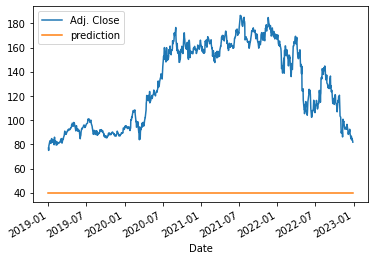

In [54]:
def actual_pred_plot(preds):
    '''
    Plot actual vs predicted stock prices using data from the preds argument
    
    input:
      preds: numpy array of predicted stock prices
      
    output:
      mean squared error: mean squared error between actual and predicted stock prices
      plot: plot of actual vs predicted stock prices
    '''
    # create a dataframe for actual and predicted stock prices
    actual_pred = pd.DataFrame(columns = ['Adj. Close', 'prediction'])
    actual_pred['Adj. Close'] = all_data.loc['2019':,'Adj Close'][0:len(preds)]
    actual_pred['prediction'] = preds[:,0]

    # calculate mean squared error
    from keras.metrics import MeanSquaredError
    m = MeanSquaredError()
    m.update_state(np.array(actual_pred['Adj. Close']),np.array(actual_pred['prediction']))
    
    # plot actual vs predicted stock prices and return mean squared error
    return (m.result().numpy(), actual_pred.plot() )
    
actual_pred_plot(rnn_predictions)  


32/32 [==============================] - 0s 3ms/step


(700.704, <matplotlib.axes._subplots.AxesSubplot at 0x7fadfbeda8e0>)

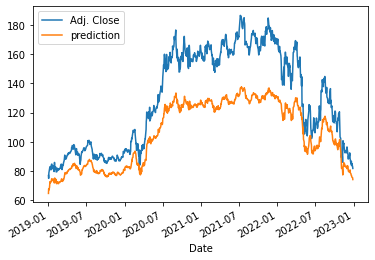

In [61]:
def ts_train_test_normalize(all_data,time_steps,for_periods):
    '''
    input: 
      all_data: dataframe with dates and price data
      time_steps: the number of time steps to look back in the time series data
      for_periods: the number of future time steps to predict
    output:
      X_train, y_train: data from 2013/1/1-2018/12/31, the training data with X_train as the input and y_train as the output
      X_test:  data from 2019 -, the testing data for prediction
      sc:      insantiated MinMaxScaler object fit to the training data
    '''
    # create training and test set
    ts_train = all_data[:'2018'].iloc[:,0:1].values # select the data from 2013/1/1-2018/12/31
    ts_test  = all_data['2022':].iloc[:,0:1].values # select the data from 2019 and beyond
    ts_train_len = len(ts_train) # get the length of the training data
    ts_test_len = len(ts_test) # get the length of the test data

    # scale the data using MinMaxScaler
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range=(0,1)) # initialize the MinMaxScaler object
    ts_train_scaled = sc.fit_transform(ts_train) # fit the scaler to the training data

    # create training data of s samples and t time steps
    X_train = [] # initialize X_train
    y_train = [] # initialize y_train
    for i in range(time_steps,ts_train_len-1): 
        X_train.append(ts_train_scaled[i-time_steps:i,0]) # get the time steps for X_train
        y_train.append(ts_train_scaled[i:i+for_periods,0]) # get the future time steps for y_train
    X_train, y_train = np.array(X_train), np.array(y_train) # convert X_train and y_train to arrays

    # Reshaping X_train for efficient modeling
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1)) # reshape X_train to add the batch size dimension

    inputs = pd.concat((all_data["Adj Close"][:'2018'], all_data["Adj Close"]['2019':]),axis=0).values # concatenate the training and test data
    inputs = inputs[len(inputs)-len(ts_test) - time_steps:] # get the inputs to make predictions on
    inputs = inputs.reshape(-1,1) # reshape the inputs
    inputs  = sc.transform(inputs) # normalize the inputs

    # Preparing X_test
    X_test = [] # initialize X_test
    for i in range(time_steps,ts_test_len+time_steps-for_periods):
        X_test.append(inputs[i-time_steps:i


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 4ms/step


(330.8649, <matplotlib.axes._subplots.AxesSubplot at 0x7fadf61eb610>)

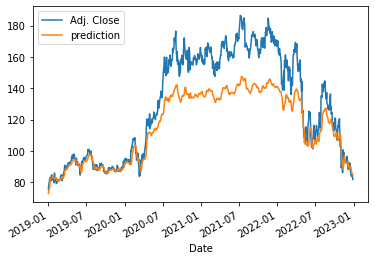

In [62]:
def LSTM_model(X_train, y_train, X_test, sc):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU, LSTM
    from keras.optimizers import SGD
    
    # The LSTM architecture
    my_LSTM_model = Sequential()
    my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_LSTM_model.add(LSTM(units=50, activation='tanh'))
    my_LSTM_model.add(Dense(units=2))

    # Compiling
    my_LSTM_model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    my_LSTM_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)

    LSTM_prediction = my_LSTM_model.predict(X_test)
    LSTM_prediction = sc.inverse_transform(LSTM_prediction)

    return my_LSTM_model, LSTM_prediction

my_LSTM_model, LSTM_prediction = LSTM_model(X_train, y_train, X_test, sc)
LSTM_prediction[1:10]
actual_pred_plot(LSTM_prediction)   

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 6ms/step


(425.0893, <matplotlib.axes._subplots.AxesSubplot at 0x7fadf3af91c0>)

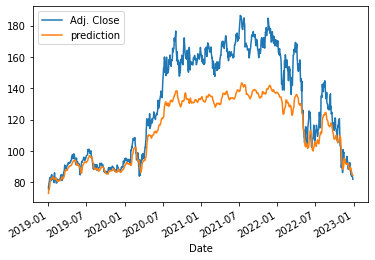

In [63]:
def LSTM_model_regularization(X_train, y_train, X_test, sc):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU, LSTM
    from keras.optimizers import SGD
    
    # The LSTM architecture
    my_LSTM_model = Sequential()
    my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_LSTM_model.add(LSTM(units=50, activation='tanh'))
    my_LSTM_model.add(Dense(units=2))

    # Compiling
    my_LSTM_model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    my_LSTM_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)

    LSTM_prediction = my_LSTM_model.predict(X_test)
    LSTM_prediction = sc.inverse_transform(LSTM_prediction)

    return my_LSTM_model, LSTM_prediction

my_LSTM_model, LSTM_prediction = LSTM_model_regularization(X_train, y_train, X_test, sc)
LSTM_prediction[1:10]
actual_pred_plot(LSTM_prediction)  

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 4ms/step


(91.21122, <matplotlib.axes._subplots.AxesSubplot at 0x7fadf978edf0>)

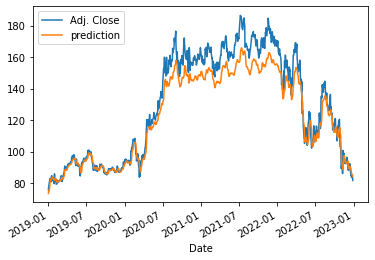

In [58]:
def GRU_model(X_train, y_train, X_test, sc):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU
    from keras.optimizers import SGD
    
    # The GRU architecture
    my_GRU_model = Sequential()
    # First GRU layer with Dropout regularisation
    my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_GRU_model.add(GRU(units=50, activation='tanh'))
    my_GRU_model.add(Dense(units=2))

    # Compiling the RNN
    my_GRU_model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    my_GRU_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)

    GRU_prediction = my_GRU_model.predict(X_test)
    GRU_prediction = sc.inverse_transform(GRU_prediction)

    return my_GRU_model, GRU_prediction

my_GRU_model, GRU_prediction = GRU_model(X_train, y_train, X_test, sc)
GRU_prediction[1:10]
actual_pred_plot(GRU_prediction)  

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


32/32 [==============================] - 2s 6ms/step


(91.21122, <matplotlib.axes._subplots.AxesSubplot at 0x7fadf9164eb0>)

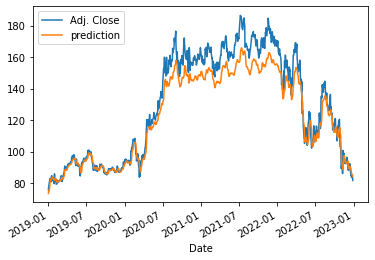

In [59]:
def GRU_model_regularization(X_train, y_train, X_test, sc):
    '''
    create GRU model trained on X_train and y_train
    
    and make predictions on the X_test data
    '''
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU
    from keras.optimizers import SGD
    from keras.layers import Dropout
    
    # The GRU architecture
    my_GRU_model = Sequential()
    # First GRU layer with Dropout regularisation
    my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_GRU_model.add(Dropout(0.2))
    # Second GRU layer
    my_GRU_model.add(GRU(units=50, return_sequences=True, activation='tanh'))
    my_GRU_model.add(Dropout(0.2))
    
    # Third GRU layer
    my_GRU_model.add(GRU(units=50, return_sequences=True, activation='tanh'))
    my_GRU_model.add(Dropout(0.2))
    # Fourth GRU layer
    my_GRU_model.add(GRU(units=50, activation='tanh'))
    my_GRU_model.add(Dropout(0.2))
    # The output layer
    my_GRU_model.add(Dense(units=1))
    # Compiling the RNN
    my_GRU_model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    my_GRU_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)

    GRU_predictions = my_GRU_model.predict(X_test)
    GRU_predictions = sc.inverse_transform(GRU_predictions)

    return my_GRU_model, GRU_predictions

my_GRU_model, GRU_predictions = GRU_model_regularization(X_train, y_train, X_test, sc)
GRU_predictions[1:10]
actual_pred_plot(GRU_prediction)  